### THE SPARK FOUNDATION
#### Author - Ashutosh Singh Kushwaha
#### Domain : Data Science & Bussiness Analytics
- Task number 6,7 

Task7 : Stock Prediction using Numerical and Textual Analysis
- Objective :  Create a hybrid model for stock price or performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines. The stock to analyze and predict is SENSEX (S&P BSE SENSEX)

# Import the Important Libraries

In [83]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
import re
from pandas_datareader.data import DataReader
from datetime import datetime
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from tqdm import tqdm
tqdm.pandas()

import warnings
warnings.filterwarnings('ignore')

### Data Collection and Understanding about the Data

In [101]:
## News Dataset DF1 : New Dataset
df1 = pd.read_csv("dataset2.csv",names=['date','category','news'])

In [102]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3876558 entries, 0 to 3876557
Data columns (total 3 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   date      object
 1   category  object
 2   news      object
dtypes: object(3)
memory usage: 88.7+ MB


In [103]:
df1.shape

(3876558, 3)

In [104]:
df1.head()

,date,category,news
0,publish_date,headline_category,headline_text
1,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
2,20010102,unknown,Fissures in Hurriyat over Pak visit
3,20010102,unknown,America's unwanted heading for India?
4,20010102,unknown,For bigwigs; it is destination Goa


In [105]:
df1.tail()

,date,category,news
3876553,20230630,city.goa,10 PIs move HC over thwarted seniority
3876554,20230630,city.goa,Govt notifies award in memory of Parrikar for ...
3876555,20230630,city.goa,After youth's death; PWD installs crash barrie...
3876556,20230630,city.goa,Authorities not acting against CRZ violations
3876557,20230630,city.goa,Technicians to hold trial run of mini-EVs in P...


In [106]:
## Change  Date Format to 2008-01-01
df1.drop(0, inplace=True)
df1['date'] = pd.to_datetime(df1['date'] ,format = '%Y%m%d')
df1 = df1[['date','news']]

In [107]:
## filtering News from start='2016-01-01', end='2019-01-01'
start ='2016-01-01'
end = '2019-01-01'
df1 = df1[(df1['date']>=start) & (df1['date']<=end)]

In [108]:
df1['news'] = df1.groupby(['date']).transform(lambda x : " ".join(x))
df1.drop_duplicates(inplace = True)
df1.reset_index(inplace = True ,drop =True)

In [109]:
df1.isnull().sum()

date    0
news    0
dtype: int64

In [110]:
df1.head()

,date,news
0,2016-01-01,In pics: 6 winter foods that help you lose wei...
1,2016-01-02,4 foods to detox your system Things that happe...
2,2016-01-03,5-point gym protocol to follow 7 effective det...
3,2016-01-04,Surprising facts about exercise sweat Bizarre ...
4,2016-01-05,Top 8 weight management tips for travellers Ar...


In [111]:
df1.duplicated().sum()

0

In [112]:
df1_copy = df1

In [114]:
df1_copy

,date,news
0,2016-01-01,In pics: 6 winter foods that help you lose wei...
1,2016-01-02,4 foods to detox your system Things that happe...
2,2016-01-03,5-point gym protocol to follow 7 effective det...
3,2016-01-04,Surprising facts about exercise sweat Bizarre ...
4,2016-01-05,Top 8 weight management tips for travellers Ar...
...,...,...
1092,2018-12-28,Anticipatory bail for Murugadoss RRB JE Recrui...
1093,2018-12-29,NRCB symposium looks to curb wilt disease in b...
1094,2018-12-30,'Vithai' new addition to MSRTC fleet Best beau...
1095,2018-12-31,Dumping ground gets a makeover with tree plant...


## Basis text preprocessing 

In [113]:
## remove HTML Tags if there
import re
def remove_html_tags(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r'',text)

In [115]:
df1['news'] = df1['news'].apply(remove_html_tags)

In [116]:
df1

,date,news
0,2016-01-01,In pics: 6 winter foods that help you lose wei...
1,2016-01-02,4 foods to detox your system Things that happe...
2,2016-01-03,5-point gym protocol to follow 7 effective det...
3,2016-01-04,Surprising facts about exercise sweat Bizarre ...
4,2016-01-05,Top 8 weight management tips for travellers Ar...
...,...,...
1092,2018-12-28,Anticipatory bail for Murugadoss RRB JE Recrui...
1093,2018-12-29,NRCB symposium looks to curb wilt disease in b...
1094,2018-12-30,'Vithai' new addition to MSRTC fleet Best beau...
1095,2018-12-31,Dumping ground gets a makeover with tree plant...


In [122]:
## punctuation removal
import string
exclude = string.punctuation
def remove_punc(text):
    for c in exclude:
        text = text.replace(c,'')
    return text

In [123]:
df1['news'] = df1['news'].apply(remove_punc)

In [124]:
df1

,date,news
0,2016-01-01,In pics 6 winter foods that help you lose weig...
1,2016-01-02,4 foods to detox your system Things that happe...
2,2016-01-03,5point gym protocol to follow 7 effective deto...
3,2016-01-04,Surprising facts about exercise sweat Bizarre ...
4,2016-01-05,Top 8 weight management tips for travellers Ar...
...,...,...
1092,2018-12-28,Anticipatory bail for Murugadoss RRB JE Recrui...
1093,2018-12-29,NRCB symposium looks to curb wilt disease in b...
1094,2018-12-30,Vithai new addition to MSRTC fleet Best beauty...
1095,2018-12-31,Dumping ground gets a makeover with tree plant...


## Text Analysis

In [125]:
## Adding meta Features using textblob and Polarity Score Module
## function 
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

sia = SIA()

def get_score(text,attr):
    return sia.polarity_scores(text)[attr]


In [126]:
df1['subjectivity'] = df1['news'].apply(getSubjectivity)
df1['polarity'] = df1['news'].apply(getPolarity)

In [128]:
df1['Compound'] = df1['news'].progress_apply(get_score,attr = 'compound')

100%|██████████| 1097/1097 [06:03<00:00,  3.02it/s]


In [129]:
df1['negative'] = df1['news'].progress_apply(get_score,attr = 'neg')

100%|██████████| 1097/1097 [06:02<00:00,  3.02it/s]


In [130]:
df1['neutral'] = df1['news'].progress_apply(get_score,attr = 'neu')

100%|██████████| 1097/1097 [06:01<00:00,  3.04it/s]


In [131]:
df1['positive'] = df1['news'].progress_apply(get_score,attr = 'pos')

100%|██████████| 1097/1097 [06:01<00:00,  3.03it/s]


In [132]:
df1

,date,news,subjectivity,polarity,Compound,negative,neutral,positive
0,2016-01-01,In pics 6 winter foods that help you lose weig...,0.437239,0.092395,-0.9943,0.112,0.780,0.109
1,2016-01-02,4 foods to detox your system Things that happe...,0.457513,0.082387,-0.9996,0.133,0.764,0.103
2,2016-01-03,5point gym protocol to follow 7 effective deto...,0.411025,0.075095,-0.9999,0.181,0.705,0.114
3,2016-01-04,Surprising facts about exercise sweat Bizarre ...,0.422074,0.040701,-0.9998,0.156,0.726,0.118
4,2016-01-05,Top 8 weight management tips for travellers Ar...,0.376291,0.056223,-1.0000,0.176,0.728,0.096
...,...,...,...,...,...,...,...,...
1092,2018-12-28,Anticipatory bail for Murugadoss RRB JE Recrui...,0.389060,0.022398,-0.9999,0.148,0.767,0.085
1093,2018-12-29,NRCB symposium looks to curb wilt disease in b...,0.440860,0.068720,-1.0000,0.169,0.735,0.096
1094,2018-12-30,Vithai new addition to MSRTC fleet Best beauty...,0.444485,0.069258,-0.9999,0.164,0.723,0.113
1095,2018-12-31,Dumping ground gets a makeover with tree plant...,0.409046,0.052124,-0.9999,0.173,0.710,0.117


df2 : BSESN Data from start='2016-01-01', end='2019-01-01'

In [8]:
!pip install yfinance --upgrade --no-cache-dir

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 207.5 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=94d48747fbf12c347bb7090d3477656bb69bdcb193e51b6423d8e89228605518
  Stored in directory: /tmp/pip-ephem-wheel-cache-lt1wvwlt/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [133]:
import yfinance as yf
df2 = yf.download('^BSESN', start='2016-01-01', end='2019-01-01')
df2.reset_index(inplace = True)

[*********************100%%**********************]  1 of 1 completed


In [134]:
df2.rename(columns = {'Date' : 'date' ,'Close':'close'} , inplace = True)
df2.head()

,date,Open,High,Low,close,Adj Close,Volume
0,2016-01-04,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
1,2016-01-05,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2,2016-01-06,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
3,2016-01-07,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
4,2016-01-08,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900


In [135]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 739 entries, 0 to 738
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       739 non-null    datetime64[ns]
 1   Open       739 non-null    float64       
 2   High       739 non-null    float64       
 3   Low        739 non-null    float64       
 4   close      739 non-null    float64       
 5   Adj Close  739 non-null    float64       
 6   Volume     739 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 40.5 KB


In [136]:
df2.dtypes

date         datetime64[ns]
Open                float64
High                float64
Low                 float64
close               float64
Adj Close           float64
Volume                int64
dtype: object

In [43]:
df2.shape

(739, 6)

In [137]:
df2.isnull().sum()

date         0
Open         0
High         0
Low          0
close        0
Adj Close    0
Volume       0
dtype: int64

In [138]:
df2.duplicated().sum()

0

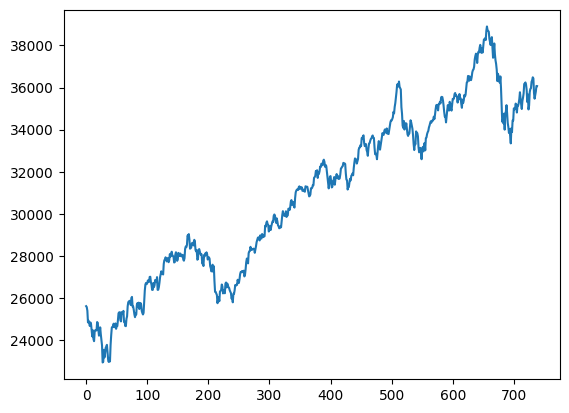

In [140]:
import matplotlib.pyplot as plt
plt.plot(df2['close'])

final Merged dataset

In [152]:
df_merge = pd.merge(df1,df2,how = 'inner' ,on = 'date')
df_merge

,date,news,subjectivity,polarity,Compound,negative,neutral,positive,Open,High,Low,close,Adj Close,Volume
0,2016-01-04,Surprising facts about exercise sweat Bizarre ...,0.422074,0.040701,-0.9998,0.156,0.726,0.118,26116.519531,26116.519531,25596.570312,25623.349609,25623.349609,9100
1,2016-01-05,Top 8 weight management tips for travellers Ar...,0.376291,0.056223,-1.0000,0.176,0.728,0.096,25744.699219,25766.759766,25513.750000,25580.339844,25580.339844,10300
2,2016-01-06,8 ways to say NO to stress 8 exercises that to...,0.408178,0.086555,-0.9997,0.150,0.731,0.119,25628.230469,25632.570312,25357.699219,25406.330078,25406.330078,13400
3,2016-01-07,Harmful effects of placing laptop directly on ...,0.420572,0.087280,-0.9999,0.152,0.744,0.104,25224.699219,25230.349609,24825.699219,24851.830078,24851.830078,11800
4,2016-01-08,Workout routines Kettlebell workouts Lenovos T...,0.429404,0.076716,-0.9995,0.121,0.784,0.095,24969.019531,25083.550781,24887.220703,24934.330078,24934.330078,15900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,2018-12-24,Preparations on for PMs visit to Bogibeel CBSE...,0.414060,0.098551,-0.9997,0.149,0.727,0.124,35859.660156,35910.671875,35423.238281,35470.148438,35470.148438,13245200
735,2018-12-26,Pride in co helps to keep employees more engag...,0.396507,0.019795,-0.9998,0.130,0.783,0.087,35443.160156,35711.261719,35010.820312,35649.941406,35649.941406,16200
736,2018-12-27,Porn subscribers slam govt move to ban 827 adu...,0.423383,0.018720,-0.9999,0.146,0.779,0.075,36002.109375,36041.238281,35781.949219,35807.281250,35807.281250,13054200
737,2018-12-28,Anticipatory bail for Murugadoss RRB JE Recrui...,0.389060,0.022398,-0.9999,0.148,0.767,0.085,35911.988281,36194.781250,35911.988281,36076.718750,36076.718750,10426300


In [153]:
## Dateset for Data Modeling 
df_merge = df_merge[['close','subjectivity','polarity','Compound','negative','neutral','positive']]
df_merge

,close,subjectivity,polarity,Compound,negative,neutral,positive
0,25623.349609,0.422074,0.040701,-0.9998,0.156,0.726,0.118
1,25580.339844,0.376291,0.056223,-1.0000,0.176,0.728,0.096
2,25406.330078,0.408178,0.086555,-0.9997,0.150,0.731,0.119
3,24851.830078,0.420572,0.087280,-0.9999,0.152,0.744,0.104
4,24934.330078,0.429404,0.076716,-0.9995,0.121,0.784,0.095
...,...,...,...,...,...,...,...
734,35470.148438,0.414060,0.098551,-0.9997,0.149,0.727,0.124
735,35649.941406,0.396507,0.019795,-0.9998,0.130,0.783,0.087
736,35807.281250,0.423383,0.018720,-0.9999,0.146,0.779,0.075
737,36076.718750,0.389060,0.022398,-0.9999,0.148,0.767,0.085


## Data Normalization Using MinMaxScaler

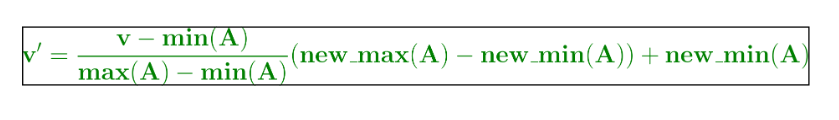

In [154]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df_merge))
df.columns = df_merge.columns
df.index = df_merge.index
df.head()

,close,subjectivity,polarity,Compound,negative,neutral,positive
0,0.167548,0.655841,0.367005,0.00010,0.556604,0.172131,0.743590
1,0.164851,0.326654,0.479884,0.00000,0.745283,0.188525,0.461538
2,0.153937,0.555925,0.700465,0.00015,0.500000,0.213115,0.756410
3,0.119161,0.645043,0.705742,0.00005,0.518868,0.319672,0.564103
4,0.124335,0.708549,0.628920,0.00025,0.226415,0.647541,0.448718


In [156]:
df.head()

,close,subjectivity,polarity,Compound,negative,neutral,positive
0,0.167548,0.655841,0.367005,0.00010,0.556604,0.172131,0.743590
1,0.164851,0.326654,0.479884,0.00000,0.745283,0.188525,0.461538
2,0.153937,0.555925,0.700465,0.00015,0.500000,0.213115,0.756410
3,0.119161,0.645043,0.705742,0.00005,0.518868,0.319672,0.564103
4,0.124335,0.708549,0.628920,0.00025,0.226415,0.647541,0.448718


In [157]:
df_merge = df

In [158]:
X = df_merge.drop('close' ,axis = 1)
y = df_merge['close']

### Split Dataset into Train & Test Data

In [160]:
X_train , X_test  , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0)
X_train.shape

(591, 6)

## Random forest Regressor

In [161]:
from sklearn.ensemble import RandomForestRegressor

In [166]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred =rf.predict(X_test)

In [167]:
print('Mean Squared error: ',mean_squared_error(y_pred,y_test))

Mean Squared error:  0.06025909366994668
